In [1]:
import os
import pandas as pd
from collections import Counter

#wordcloud
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

#NLP Sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer



# Texual Data Exploration

In [2]:
# Van Halen 1984 Album

album_folder = r"C:\Users\mehrn\Desktop\Halen_1984"

#list all the songs that have lyrics in the album
songs = os.listdir(album_folder)
songs


['Drop Dead Legs.txt',
 'Girl Gone Bad.txt',
 'Hot for Teacher.txt',
 'House of Pain.txt',
 "I'll Wait.txt",
 'Jump.txt',
 'Panama.txt',
 'Top Jimmy.txt']

In [3]:
# create list of song's lyrics 

for lyrics in songs:
    with open(album_folder+'/'+lyrics, encoding ="utf8") as f_input:
        album_corpus.append(f_input.read())
    

In [4]:
album_corpus

["Drop dead legs, pretty smile\nHurts my head, gets me wild\nDig that steam\nGiant butt\nMakes me scream\nI get nothing, nothing but the shakes over you\nAnd nothing else could ever do\n\n[Chorus:]\nYou know that you want it\nI know what you need\nYou know that you want it, baby\nWhen the night is through, will I still be loving you?\n\nDig those moves, vampire\nSet me loose, get it higher\nThrow my rope, loop-de-loop\nNice white teeth, Betty Boop\nSet it cool, real heavy\nI ain't fooled, gettin' ready\nOooh, aw baby\n\n[Chorus]\nYou know that you want it\nI know what you need\nYou know that you want it, baby\nWhen the night is through, will I still be loving you?",
 "[Verse 1]\nAh lazy eyes in the summer heat\nFresh from outta town\nNow she's working on the street\nShakin' poor boys down\n\n[Chorus]\nUh (girl) uh girl gone bad\n(Girl) girl gone bad\n\n[Verse 2]\nFound that girl with a lonesome John\nBut she should've been with me\nGuess that woman fallen in love\nShe don't work for fr

In [5]:
# iterating through lyrics and create a variabe named album_word_list to get each single word of each lyrics
album_word_list = []

for lyrics in album_corpus:
    for word in lyrics.split():
        album_word_list.append(word)

album_word_list        

['Drop',
 'dead',
 'legs,',
 'pretty',
 'smile',
 'Hurts',
 'my',
 'head,',
 'gets',
 'me',
 'wild',
 'Dig',
 'that',
 'steam',
 'Giant',
 'butt',
 'Makes',
 'me',
 'scream',
 'I',
 'get',
 'nothing,',
 'nothing',
 'but',
 'the',
 'shakes',
 'over',
 'you',
 'And',
 'nothing',
 'else',
 'could',
 'ever',
 'do',
 '[Chorus:]',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it',
 'I',
 'know',
 'what',
 'you',
 'need',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it,',
 'baby',
 'When',
 'the',
 'night',
 'is',
 'through,',
 'will',
 'I',
 'still',
 'be',
 'loving',
 'you?',
 'Dig',
 'those',
 'moves,',
 'vampire',
 'Set',
 'me',
 'loose,',
 'get',
 'it',
 'higher',
 'Throw',
 'my',
 'rope,',
 'loop-de-loop',
 'Nice',
 'white',
 'teeth,',
 'Betty',
 'Boop',
 'Set',
 'it',
 'cool,',
 'real',
 'heavy',
 'I',
 "ain't",
 'fooled,',
 "gettin'",
 'ready',
 'Oooh,',
 'aw',
 'baby',
 '[Chorus]',
 'You',
 'know',
 'that',
 'you',
 'want',
 'it',
 'I',
 'know',
 'what',
 'you',
 'need',
 'You',
 'kno

In [6]:
# find the total number of the words in the album lyrics:
len(album_word_list)

1398

In [7]:
#determine number of unique words
album_word_count_unique = Counter(album_word_list)
len(album_word_count_unique)

493

In [8]:
#George Orwell 1984 novel
novel = "1984-novel-George Orwell.txt"
novel_corpus = []

with open(novel, encoding = "utf8") as f_input:
    novel_corpus.append(f_input.read())

novel_corpus

['Title:      Nineteen eighty-four\nAuthor:     George Orwell (pseudonym of Eric Blair) (1903-1950)\n\n\n\n\nPART ONE\n\n\n\nChapter 1\n\n\n\nIt was a bright cold day in April, and the clocks were striking thirteen.\nWinston Smith, his chin nuzzled into his breast in an effort to escape the\nvile wind, slipped quickly through the glass doors of Victory Mansions,\nthough not quickly enough to prevent a swirl of gritty dust from entering\nalong with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a\ncoloured poster, too large for indoor display, had been tacked to the wall.\nIt depicted simply an enormous face, more than a metre wide: the face of a\nman of about forty-five, with a heavy black moustache and ruggedly handsome\nfeatures. Winston made for the stairs. It was no use trying the lift. Even\nat the best of times it was seldom working, and at present the electric\ncurrent was cut off during daylight hours. It was part of the economy drive\nin prepara

In [9]:
novel_word_list = novel_corpus[0].split()
novel_word_list

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'of',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'was',
 'a',
 'bright',
 'cold',
 'day',
 'in',
 'April,',
 'and',
 'the',
 'clocks',
 'were',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'his',
 'chin',
 'nuzzled',
 'into',
 'his',
 'breast',
 'in',
 'an',
 'effort',
 'to',
 'escape',
 'the',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'through',
 'the',
 'glass',
 'doors',
 'of',
 'Victory',
 'Mansions,',
 'though',
 'not',
 'quickly',
 'enough',
 'to',
 'prevent',
 'a',
 'swirl',
 'of',
 'gritty',
 'dust',
 'from',
 'entering',
 'along',
 'with',
 'him.',
 'The',
 'hallway',
 'smelt',
 'of',
 'boiled',
 'cabbage',
 'and',
 'old',
 'rag',
 'mats.',
 'At',
 'one',
 'end',
 'of',
 'it',
 'a',
 'coloured',
 'poster,',
 'too',
 'large',
 'for',
 'indoor',
 'display,',
 'had',
 'been',
 'tacked',
 'to',
 'the',
 'wall.',
 'It',
 'depicted',
 'simply',
 'an',

In [10]:
len(novel_word_list)

103377

In [11]:
len(Counter(novel_word_list))

15530

# Word Cloud

In [12]:
# determining the words which are frequently used 
stopwords = list(get_stop_words("english"))
stopwords

['hereupon',
 'along',
 'value',
 'hereafter',
 'last',
 'hither',
 'throughout',
 'various',
 'them',
 'j',
 'onto',
 "why's",
 'co',
 'here',
 'get',
 'came',
 'relatively',
 "shouldn't",
 'does',
 'quite',
 'edu',
 'who',
 'six',
 'after',
 'where',
 'inner',
 "don't",
 'almost',
 'usually',
 "they're",
 'indicated',
 'viz',
 'self',
 'lest',
 'welcome',
 'just',
 'while',
 'specifying',
 'cannot',
 'gets',
 'for',
 'thence',
 'theirs',
 'inward',
 'still',
 'appropriate',
 'somewhere',
 'needs',
 'up',
 'sup',
 'nowhere',
 'amongst',
 'apart',
 'off',
 'our',
 'sensible',
 "that's",
 'hence',
 'entirely',
 'asking',
 'near',
 'three',
 'zero',
 'at',
 "won't",
 'provides',
 'anything',
 'right',
 'per',
 'thanx',
 'such',
 'l',
 'thereafter',
 'exactly',
 'changes',
 "shan't",
 'sorry',
 'via',
 'eg',
 "wasn't",
 'how',
 'insofar',
 'nothing',
 'whence',
 'you',
 'regards',
 'happens',
 'of',
 'reasonably',
 'different',
 'despite',
 'least',
 "we're",
 'likely',
 'next',
 'knows',

In [13]:
#Cleaning album data

clean_album = []

for word in album_word_list:
    if word not in stopwords:
        clean_album.append(word)

In [14]:
clean_album

['Drop',
 'dead',
 'legs,',
 'pretty',
 'smile',
 'Hurts',
 'head,',
 'wild',
 'Dig',
 'steam',
 'Giant',
 'butt',
 'Makes',
 'scream',
 'I',
 'nothing,',
 'shakes',
 'And',
 '[Chorus:]',
 'You',
 'I',
 'You',
 'it,',
 'baby',
 'When',
 'night',
 'through,',
 'I',
 'loving',
 'you?',
 'Dig',
 'moves,',
 'vampire',
 'Set',
 'loose,',
 'higher',
 'Throw',
 'rope,',
 'loop-de-loop',
 'Nice',
 'white',
 'teeth,',
 'Betty',
 'Boop',
 'Set',
 'cool,',
 'real',
 'heavy',
 'I',
 'fooled,',
 "gettin'",
 'ready',
 'Oooh,',
 'aw',
 'baby',
 '[Chorus]',
 'You',
 'I',
 'You',
 'it,',
 'baby',
 'When',
 'night',
 'through,',
 'I',
 'loving',
 'you?',
 '[Verse',
 '1]',
 'Ah',
 'lazy',
 'eyes',
 'summer',
 'heat',
 'Fresh',
 'outta',
 'town',
 'Now',
 'working',
 'street',
 "Shakin'",
 'poor',
 'boys',
 '[Chorus]',
 'Uh',
 '(girl)',
 'uh',
 'girl',
 'bad',
 '(Girl)',
 'girl',
 'bad',
 '[Verse',
 '2]',
 'Found',
 'girl',
 'lonesome',
 'John',
 'But',
 "should've",
 'Guess',
 'woman',
 'fallen',
 'love'

In [15]:
#determine the frequency of clean_album words using nltk
import nltk

frequency_clean_album = nltk.FreqDist(clean_album)
frequency_clean_album

FreqDist({'I': 37, '[Chorus]': 17, 'bad,': 16, 'bad': 15, "I'm": 15, 'hot': 13, '[Verse': 12, 'teacher': 12, 'jump': 12, 'Panama': 10, ...})

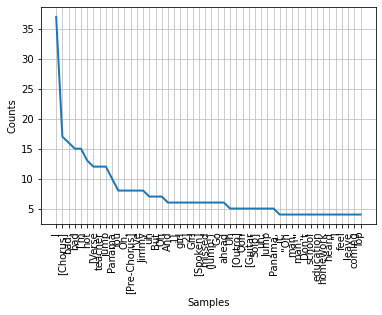

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
#plot the frequency of cleaned data(album)

frequency_clean_album.plot(50, cumulative = False)


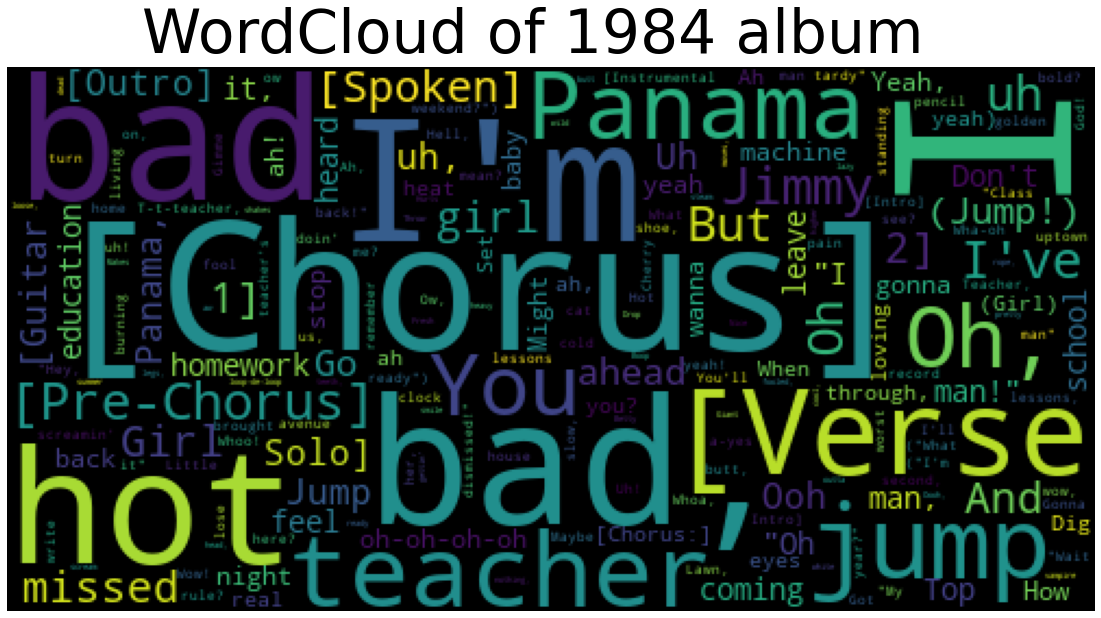

In [20]:
#create wordcloud of 1984 album
count_clean_album = Counter(clean_album)
wordcloud_1984_album = WordCloud(width = 500, height = 250).generate_from_frequencies(count_clean_album)
plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"WordCloud of 1984 album", fontsize=60, ha='center')
plt.imshow(wordcloud_1984_album)
plt.axis("off")
plt.show()

In [21]:
#Cleaning novel data
clean_novel = []
for word in novel_word_list:
    if word not in stopwords:
        clean_novel.append(word)
        
clean_novel

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'bright',
 'cold',
 'day',
 'April,',
 'clocks',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'chin',
 'nuzzled',
 'breast',
 'effort',
 'escape',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'glass',
 'doors',
 'Victory',
 'Mansions,',
 'quickly',
 'prevent',
 'swirl',
 'gritty',
 'dust',
 'entering',
 'him.',
 'The',
 'hallway',
 'smelt',
 'boiled',
 'cabbage',
 'rag',
 'mats.',
 'At',
 'end',
 'coloured',
 'poster,',
 'large',
 'indoor',
 'display,',
 'tacked',
 'wall.',
 'It',
 'depicted',
 'simply',
 'enormous',
 'face,',
 'metre',
 'wide:',
 'face',
 'man',
 'forty-five,',
 'heavy',
 'black',
 'moustache',
 'ruggedly',
 'handsome',
 'features.',
 'Winston',
 'made',
 'stairs.',
 'It',
 'lift.',
 'Even',
 'times',
 'seldom',
 'working,',
 'present',
 'electric',
 'current',
 'cut',
 'daylight',
 'hours.',
 'It'

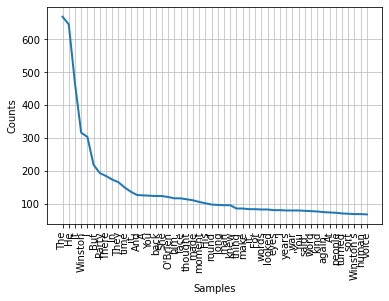

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
#plot the frequency of cleaned data (novel)
frequency_of_clean_novel = nltk.FreqDist(clean_novel)
frequency_of_clean_novel.plot(50, cumulative = False)

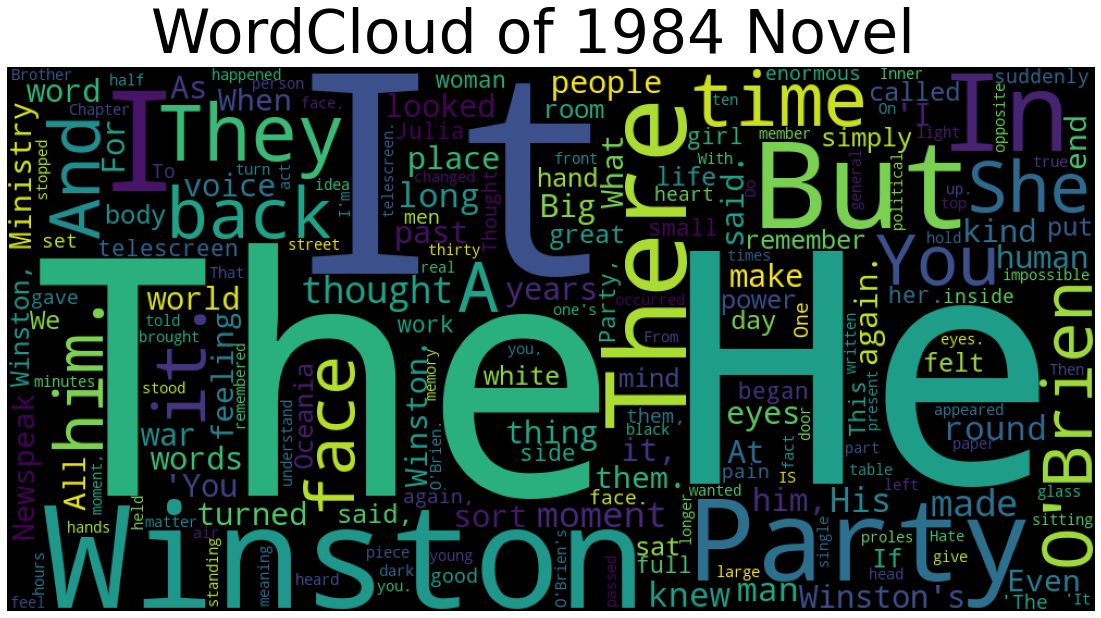

In [30]:
##create wordcloud of 1984 novel
word_cloud_novel_list = Counter(clean_novel)
word_cloud_1984_novel = WordCloud(width = 1000, height= 500).generate_from_frequencies(word_cloud_novel_list)

plt.figure(figsize = (20,10))
plt.figtext(.5,.9,"WordCloud of 1984 Novel", fontsize=60, ha="center")
plt.imshow(word_cloud_1984_novel)
plt.axis("off")
plt.show()

# NLP Summarization 

In [38]:
nltk.download("punkt")

#analyze and extract the meaning behind words
lsa = LsaSummarizer(Stemmer("english"))
lsa.stop_words = get_stop_words("english")

#parse plain text documents and prepare them for further analysis
parser = PlaintextParser.from_string(" ".join(album_corpus), Tokenizer("english"))
lsa_summary = lsa(parser.document, 10)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]

summary_album = " ".join(lsa_summary_list)
print("summary of 1984 album")
print("summary_album")

summary of 1984 album
summary_album


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mehrn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
nltk.download("punkt")

#analyze and extract the meaning behind words
lsa = LsaSummarizer(Stemmer("english"))
lsa.stop_words = get_stop_words("english")

#parse plain text documents and prepare them for further analysis
parser = PlaintextParser.from_string(" ".join(novel_corpus), Tokenizer("english"))
lsa_summary = lsa(parser.document, 20)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]

summary_novel = " ".join(lsa_summary_list)
print("summary of 1984 novel")
print(summary_novel)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mehrn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


summary of 1984 novel
When one knew that any document was due for destruction, or even when one saw a scrap of waste paper lying about, it was an automatic action to lift the flap of the nearest memory hole and drop it in, whereupon it would be whirled away on a current of warm air to the enormous furnaces which were hidden somewhere in the recesses of the building. And a few cubicles away a mild, ineffectual, dreamy creature named Ampleforth, with very hairy ears and a surprising talent for juggling with rhymes and metres, was engaged in producing garbled versions--definitive texts, they were called--of poems which had become ideologically offensive, but which for one reason or another were to be retained in the anthologies. And the Records Department, after all, was itself only a single branch of the Ministry of Truth, whose primary job was not to reconstruct the past but to supply the citizens of Oceania with newspapers, films, textbooks, telescreen programmes, plays, novels--with e

# NLP Sentiment Analysis

In [40]:
nltk.download("vader_lexicon")

#analyze the sentiment of text by assigning a sentiment score to each text input
sentiment_analyzer = SentimentIntensityAnalyzer()
print("Sentiment Analysis of 1984 Album")
print(sentiment_analyzer.polarity_scores(" ".join(album_corpus)))


Sentiment Analysis of 1984 Album
{'neg': 0.155, 'neu': 0.713, 'pos': 0.133, 'compound': -0.9953}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mehrn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
print("Sentiment Analysis of 1984 Novel")
print(sentiment_analyzer.polarity_scores(" ".join(novel_corpus)))

Sentiment Analysis of 1984 Novel
{'neg': 0.106, 'neu': 0.798, 'pos': 0.096, 'compound': -1.0}
